# About Time Series Forecasting in Python
Time series forecasting is the use of a model to predict future values based on previously observed values. Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post


In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# The data
here https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls


In [2]:
data = pd.read_excel("C:\\Users\\This\\Downloads\\Sample - Superstore.xls")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

In [5]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [7]:
data.shape

(9994, 21)

# Data preprocessing

In [8]:
#Remove columns which are not required in predictions

cols = ['Row ID','Order ID','Ship Date','Ship Mode',
'Customer ID','Customer Name','Segment','Country',
'City','State','Postal Code','Region','Product ID','Category',
'Sub-Category','Product Name','Quantity','Discount','Profit']

data.drop(cols, axis=1, inplace=True)
data.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [9]:
#sort the order date
data = data.sort_values('Order Date')
print(data.head(2))
print("data is null \n",data.isnull().sum())

     Order Date   Sales
7980 2014-01-03  16.448
739  2014-01-04  11.784
data is null 
 Order Date    0
Sales         0
dtype: int64


In [10]:
#Grouping sales according to order date
data.groupby("Order Date")["Sales"].sum().reset_index()

#min and max
print(data["Order Date"].min())
print(data["Order Date"].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [11]:
#set order date as index
data = data.set_index('Order Date')
data.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [12]:
#Average the daily sales value for each month
#use start of each month as the timestamp
y = data['Sales'].resample("MS").mean()
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

# Data visulization

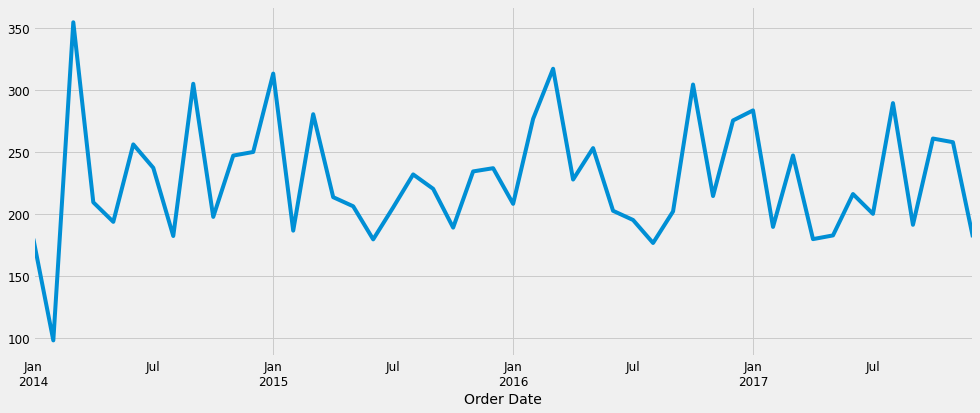

In [13]:
y.plot(figsize=(15,6))
plt.show()

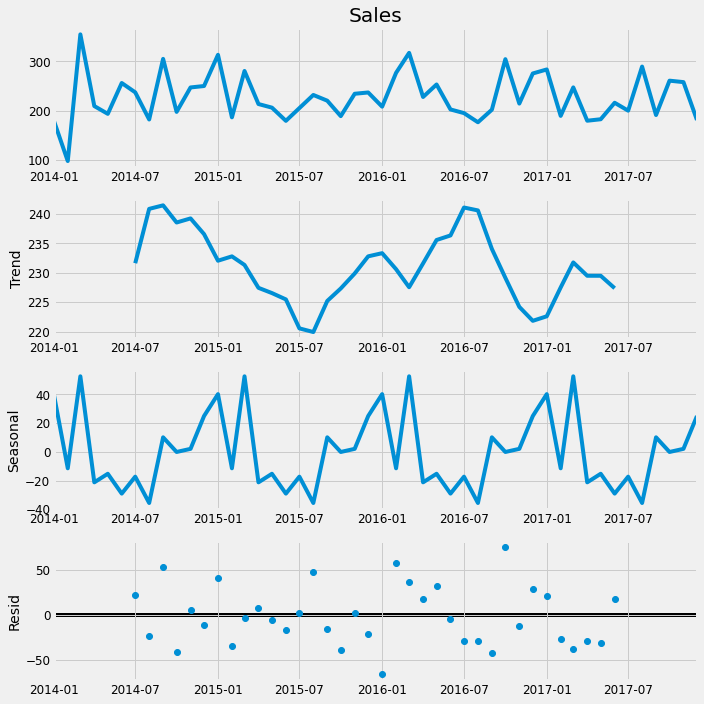

In [14]:
from pylab import rcParams
rcParams['figure.figsize']=10,10

decom = sm.tsa.seasonal_decompose(y,model ="additive")
fig = decom.plot()
plt.show()

# Time series forecasting with ARIMA model
About ARIMA model

ARIMA stands for Autoregressive Integreted Moving Average
ARIMA models are denoted with the notation ARIMA(p, d, q)
These three parameters account for seasonality, trend, and noise in data

# itertools 
According to the itertools docs, it is a “module [that] implements a number of iterator building blocks inspired by constructs from APL, Haskell, and SML… Together, they form an ‘iterator algebra’ making it possible to construct specialized tools succinctly and efficiently in pure Python.”

In [15]:
#Set the typical ranges for p d q

p=d=q=range(0,2)

#take all possible combination for p q and d

pdq = list(itertools.product(p,d,q))
seasonal_pdq =[(x[0],x[1],x[2],12) 
              for x in list(itertools.product(p,d,q))]

print("Example of Parameter combinations for seasonal ARIMA")
print("SARIMAX: {} X {}". format(pdq[1],seasonal_pdq[1]))
print("SARIMAX: {} X {}". format(pdq[1],seasonal_pdq[2]))
print("SARIMAX: {} X {}". format(pdq[2],seasonal_pdq[3]))
print("SARIMAX: {} X {}". format(pdq[2],seasonal_pdq[4]))

Example of Parameter combinations for seasonal ARIMA
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [16]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\This\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1529.5975717593867
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.0746678479151
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:396.8202649808119
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131278186
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702893253451
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.73870136528853
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:397.7103607987758
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670585


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1810.2307138583185
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.0572383632062
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:398.30739030835707
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871066885
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641112701669
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.2652484384533
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:399.11662450993884
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537222


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1514.0760487638804
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987150406
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:411.771186820049
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055304


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1789.0596746852234
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241605039
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:413.03496187670663
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.2494190718203


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1816.4781104990082
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108395853
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:393.231141794608
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.0099455851324


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2331.726866436196
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.09332875534426
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:394.0906684771758
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.994504891966


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2197.918658399557
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300756028
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:398.38088151787224
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949779
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727674
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.27571034278105
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:399.14714147390845


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9347425712448


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2067.7512681551234
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.50341283576466
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:397.07526374398327


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7532196361194
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.7494540758955
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.0818242406445
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:397.9267379149009
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467281


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2024.2579195360843
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.05937080549637
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:402.67176668680275
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870002


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2409.3859416404443
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.8530806573022
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:401.49865807993854
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933268


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1925.9099531342902
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080713714
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:395.0251886261328
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.5224773702268


C:\Users\This\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1840.8680552923047
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643704
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:395.8117139867968



# *Fitting ARIMS model

In [17]:
model = sm.tsa.statespace.SARIMAX(y,order =(1,1,1),seasonal_order =(1,1,0,12))
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1392   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


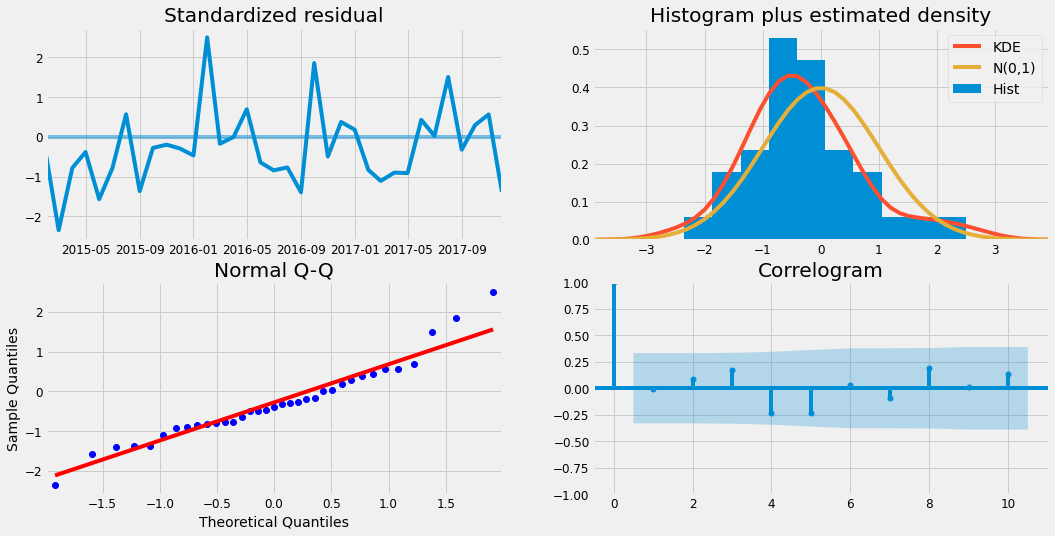

In [18]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

 It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

# Validating Forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

In [19]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'),dynamic=False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949832,380.855434
2017-02-01,128.374778,341.873713
2017-03-01,201.126555,414.265413
2017-04-01,122.357192,335.174991
2017-05-01,126.153432,338.683177
2017-06-01,87.013283,299.283137
2017-07-01,92.953018,304.987209
2017-08-01,102.323361,314.142880
2017-09-01,103.098063,314.721216


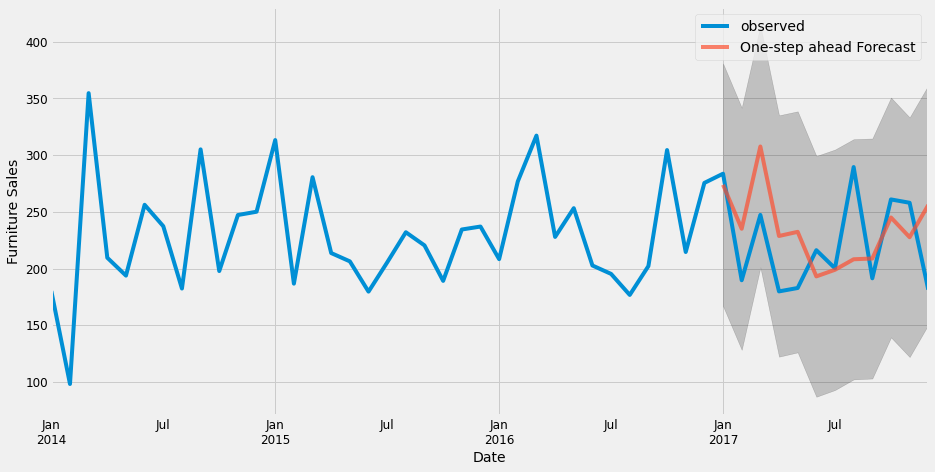

In [20]:

#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

error analysis

In [21]:
#Evaluation metrics are squared mean error and root mean sq error

y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse=((y_hat - y_truth)**2).mean()
rmse = np.sqrt(mse)

print("The mean squared error of our forecast is {}". format(round(mse,2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The mean squared error of our forecast is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


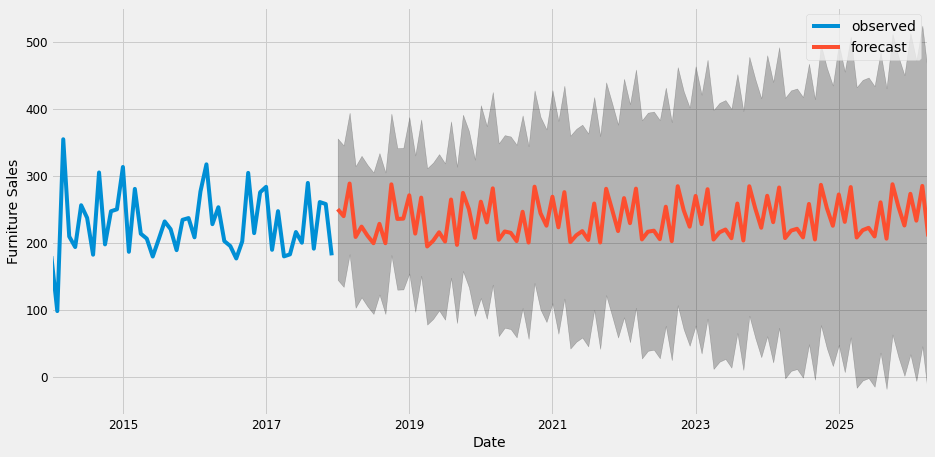

In [22]:
#Sample dATA
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Summary
Our model clearly captured furniture sales seasonality.
As we forecast further out into the future, it is natural for us to become less confident in our values.
This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the futur